<a href="https://www.kaggle.com/code/lalit7881/ai-job-shift-analytics?scriptVersionId=300566669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/dmahajanbe23/ai-job-replacement-and-skill-shift-dataset/ai_job_replacement_2020_2026_v2.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/datasets/dmahajanbe23/ai-job-replacement-and-skill-shift-dataset/ai_job_replacement_2020_2026_v2.csv")

In [3]:
df.head()

,job_id,job_role,industry,country,year,automation_risk_percent,ai_replacement_score,skill_gap_index,salary_before_usd,salary_after_usd,salary_change_percent,skill_demand_growth_percent,remote_feasibility_score,ai_adoption_level,education_requirement_level,automation_risk_category,skill_transition_pressure,wage_volatility_index,reskilling_urgency_score,ai_disruption_intensity
0,0,Data Analyst,Technology,Canada,2021,26.22,30.94,73.20,101839.02,99454.42,-2.34,2.66,15.23,86.62,2,Low,49.710,2.34,33.150,22.711764
1,1,Accountant,Finance,Brazil,2020,52.08,56.41,2.06,146389.18,139516.59,-4.69,10.43,26.36,18.34,5,Medium,27.070,4.69,22.857,9.551472
2,2,Teacher,Technology,USA,2020,31.30,31.61,43.19,64947.50,58369.41,-10.13,8.14,36.29,36.64,2,Medium,37.245,10.13,28.516,11.468320
3,3,Customer Support Rep,Technology,Brazil,2021,56.92,63.42,19.97,91708.13,86715.70,-5.44,6.11,64.68,17.05,5,Medium,38.445,5.44,30.391,9.704860
4,4,Teacher,Manufacturing,Japan,2024,14.55,17.17,96.56,127007.68,119379.11,-6.01,2.08,71.58,44.02,3,Low,55.555,6.01,36.591,6.404910


In [4]:
df.tail()

,job_id,job_role,industry,country,year,automation_risk_percent,ai_replacement_score,skill_gap_index,salary_before_usd,salary_after_usd,salary_change_percent,skill_demand_growth_percent,remote_feasibility_score,ai_adoption_level,education_requirement_level,automation_risk_category,skill_transition_pressure,wage_volatility_index,reskilling_urgency_score,ai_disruption_intensity
14995,14995,HR Manager,Finance,Canada,2025,44.05,38.61,1.06,74458.30,76568.31,2.83,-17.88,96.56,7.94,1,Medium,22.555,2.83,18.787,3.497570
14996,14996,Software Engineer,Energy,India,2023,15.68,15.37,34.93,97728.22,94274.12,-3.53,18.14,37.83,22.79,5,Low,25.305,3.53,17.810,3.573472
14997,14997,Truck Driver,Transportation,Japan,2026,80.16,67.09,48.57,74801.26,79989.74,6.94,26.51,41.20,10.57,3,High,64.365,6.94,48.717,8.472912
14998,14998,Customer Support Rep,Transportation,USA,2020,34.54,37.05,49.30,124632.88,127378.53,2.20,10.36,92.09,2.76,3,Medium,41.920,2.20,29.266,0.953304
14999,14999,Mechanical Engineer,Retail,Australia,2023,47.62,43.18,19.67,63637.98,66559.86,4.59,16.29,79.94,49.98,5,Medium,33.645,4.59,26.326,23.800476


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       15000 non-null  int64  
 1   job_role                     15000 non-null  object 
 2   industry                     15000 non-null  object 
 3   country                      15000 non-null  object 
 4   year                         15000 non-null  int64  
 5   automation_risk_percent      15000 non-null  float64
 6   ai_replacement_score         15000 non-null  float64
 7   skill_gap_index              15000 non-null  float64
 8   salary_before_usd            15000 non-null  float64
 9   salary_after_usd             15000 non-null  float64
 10  salary_change_percent        15000 non-null  float64
 11  skill_demand_growth_percent  15000 non-null  float64
 12  remote_feasibility_score     15000 non-null  float64
 13  ai_adoption_leve

In [6]:
df.describe()

,job_id,year,automation_risk_percent,ai_replacement_score,skill_gap_index,salary_before_usd,salary_after_usd,salary_change_percent,skill_demand_growth_percent,remote_feasibility_score,ai_adoption_level,education_requirement_level,skill_transition_pressure,wage_volatility_index,reskilling_urgency_score,ai_disruption_intensity
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,2022.997200,46.176347,46.155907,50.003708,89771.375196,89870.633937,0.114268,5.020461,54.898078,49.798269,3.01540,48.090028,7.986441,35.867584,23.006933
std,4330.271354,1.999365,21.663635,22.351347,28.811040,34522.125434,35897.592992,10.029197,9.956155,25.863593,28.860725,1.40512,18.107573,6.067153,12.416415,18.242259
min,0.000000,2020.000000,5.000000,4.010000,0.000000,30003.690000,19022.670000,-38.370000,-31.880000,10.010000,0.010000,1.00000,2.975000,0.000000,2.456000,0.003714
25%,3749.750000,2021.000000,28.790000,28.357500,25.170000,60127.225000,59223.457500,-6.640000,-1.662500,32.517500,24.707500,2.00000,34.900000,3.210000,26.982250,8.225829
50%,7499.500000,2023.000000,46.235000,45.675000,49.930000,89533.050000,88787.330000,0.150000,4.960000,54.775000,49.435000,3.00000,48.155000,6.665000,35.871000,18.642515
75%,11249.250000,2025.000000,63.602500,62.712500,75.025000,119823.840000,118432.967500,6.690000,11.730000,77.405000,74.795000,4.00000,61.296250,11.550000,44.698500,34.090823
max,14999.000000,2026.000000,94.980000,113.070000,99.980000,149984.060000,191961.210000,36.920000,49.790000,99.990000,99.980000,5.00000,96.340000,38.370000,71.579000,93.351726


In [7]:
df.dtypes

job_id                           int64
job_role                        object
industry                        object
country                         object
year                             int64
automation_risk_percent        float64
ai_replacement_score           float64
skill_gap_index                float64
salary_before_usd              float64
salary_after_usd               float64
salary_change_percent          float64
skill_demand_growth_percent    float64
remote_feasibility_score       float64
ai_adoption_level              float64
education_requirement_level      int64
automation_risk_category        object
skill_transition_pressure      float64
wage_volatility_index          float64
reskilling_urgency_score       float64
ai_disruption_intensity        float64
dtype: object

In [8]:
df.shape

(15000, 20)

In [9]:
df.isnull().sum()

job_id                         0
job_role                       0
industry                       0
country                        0
year                           0
automation_risk_percent        0
ai_replacement_score           0
skill_gap_index                0
salary_before_usd              0
salary_after_usd               0
salary_change_percent          0
skill_demand_growth_percent    0
remote_feasibility_score       0
ai_adoption_level              0
education_requirement_level    0
automation_risk_category       0
skill_transition_pressure      0
wage_volatility_index          0
reskilling_urgency_score       0
ai_disruption_intensity        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

job_id                         15000
job_role                          10
industry                           8
country                            9
year                               7
automation_risk_percent         6727
ai_replacement_score            7030
skill_gap_index                 7789
salary_before_usd              14989
salary_after_usd               14987
salary_change_percent           4225
skill_demand_growth_percent     4190
remote_feasibility_score        7324
ai_adoption_level               7750
education_requirement_level        5
automation_risk_category           3
skill_transition_pressure       9771
wage_volatility_index           2432
reskilling_urgency_score       13353
ai_disruption_intensity        14984
dtype: int64

In [12]:
df.columns

Index(['job_id', 'job_role', 'industry', 'country', 'year',
       'automation_risk_percent', 'ai_replacement_score', 'skill_gap_index',
       'salary_before_usd', 'salary_after_usd', 'salary_change_percent',
       'skill_demand_growth_percent', 'remote_feasibility_score',
       'ai_adoption_level', 'education_requirement_level',
       'automation_risk_category', 'skill_transition_pressure',
       'wage_volatility_index', 'reskilling_urgency_score',
       'ai_disruption_intensity'],
      dtype='object')

## EDA

In [13]:
import plotly.express as px

# Style
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

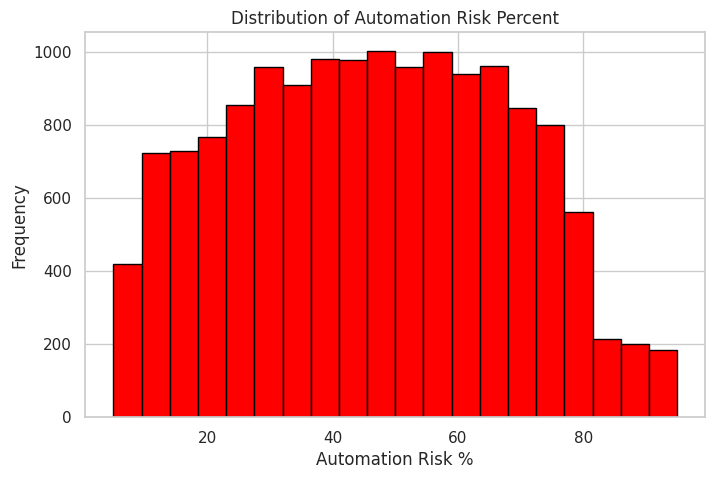

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df['automation_risk_percent'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Automation Risk Percent')
plt.xlabel('Automation Risk %')
plt.ylabel('Frequency')
plt.show()

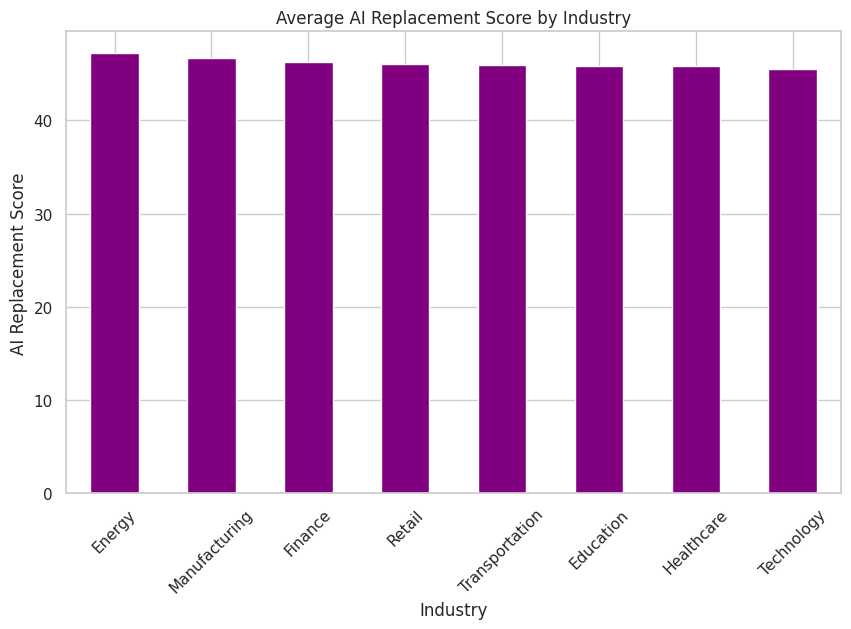

In [15]:
industry_risk = df.groupby('industry')['ai_replacement_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
industry_risk.plot(kind='bar', color='purple')
plt.title('Average AI Replacement Score by Industry')
plt.xlabel('Industry')
plt.ylabel('AI Replacement Score')
plt.xticks(rotation=45)
plt.show()

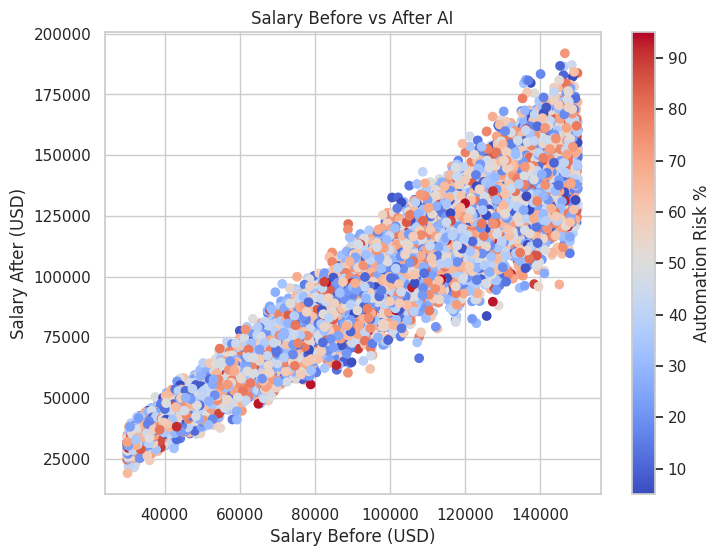

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(df['salary_before_usd'], df['salary_after_usd'], 
            c=df['automation_risk_percent'], cmap='coolwarm')

plt.colorbar(label='Automation Risk %')
plt.title('Salary Before vs After AI')
plt.xlabel('Salary Before (USD)')
plt.ylabel('Salary After (USD)')
plt.show()

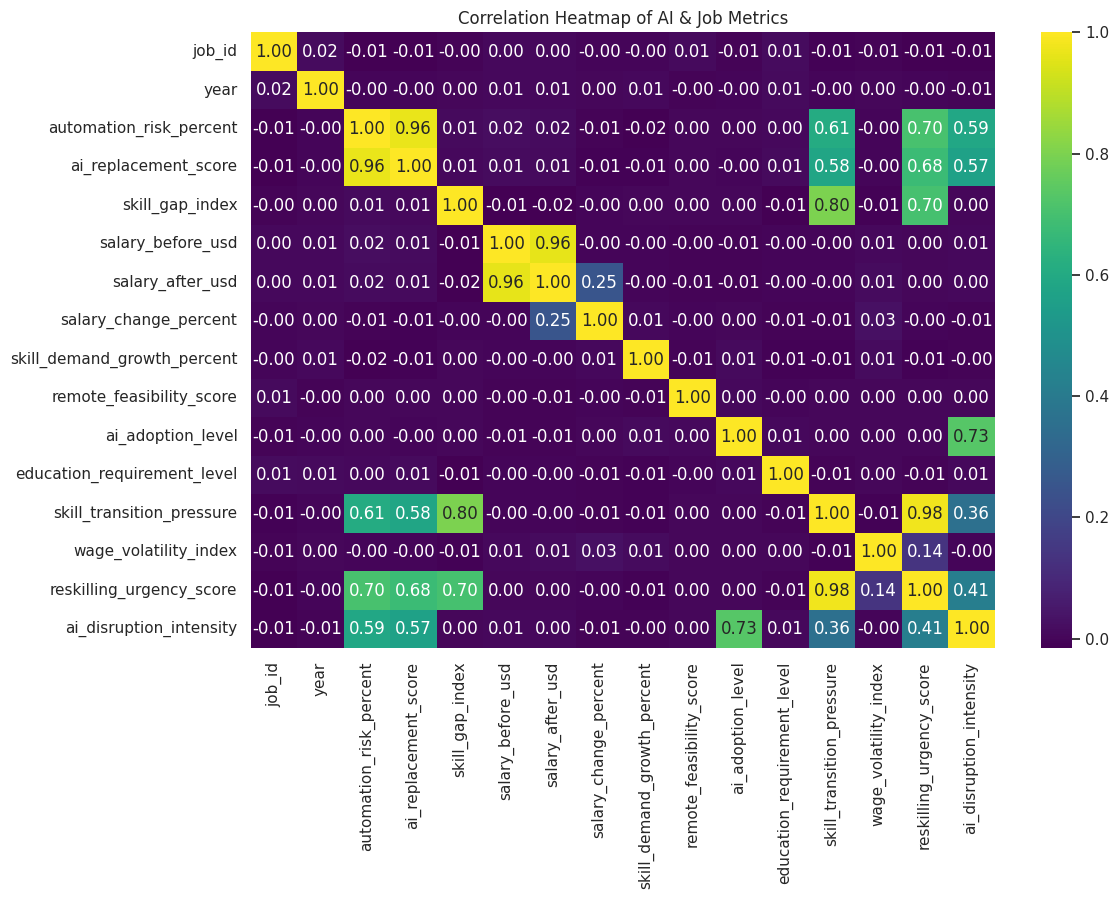

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='viridis', 
            fmt=".2f")

plt.title('Correlation Heatmap of AI & Job Metrics')
plt.show()

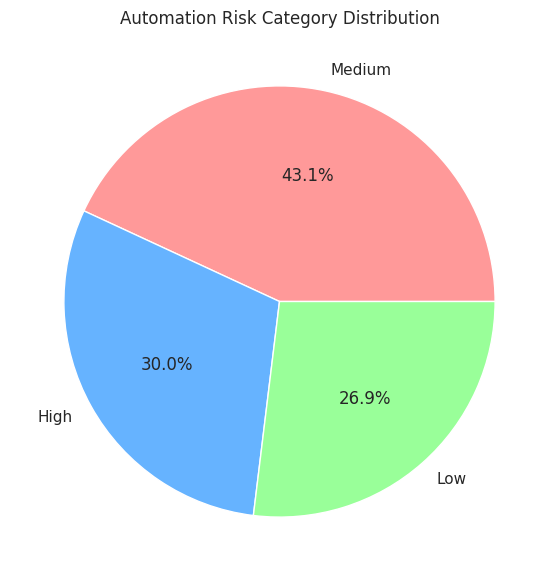

In [18]:
risk_counts = df['automation_risk_category'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(risk_counts, 
        labels=risk_counts.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Automation Risk Category Distribution')
plt.show()

In [19]:
fig = px.scatter(df,
                 x='skill_demand_growth_percent',
                 y='salary_change_percent',
                 size='reskilling_urgency_score',
                 color='ai_adoption_level',
                 hover_name='job_role',
                 title='Skill Demand Growth vs Salary Change',
                 color_discrete_sequence=px.colors.qualitative.Bold)

fig.show()

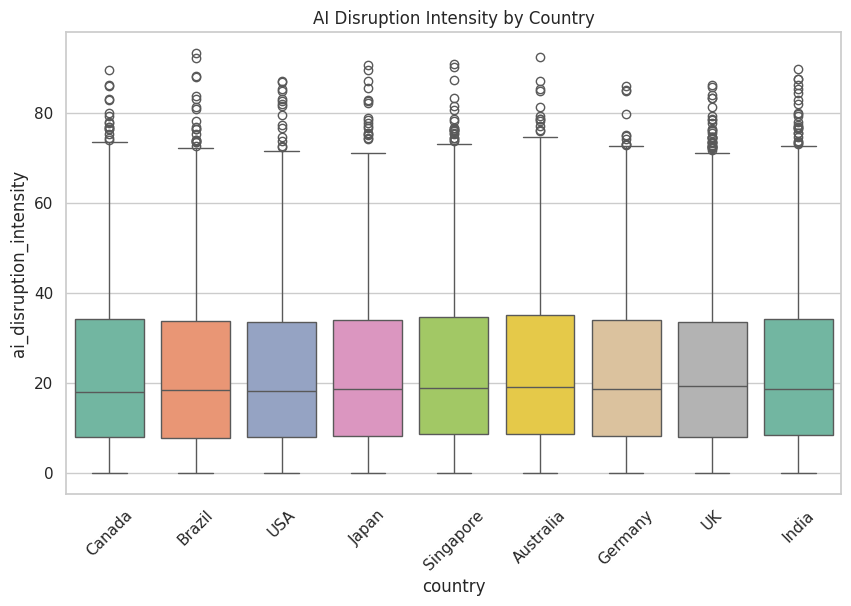

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, 
            x='country', 
            y='ai_disruption_intensity',
            palette='Set2')

plt.title('AI Disruption Intensity by Country')
plt.xticks(rotation=45)
plt.show()

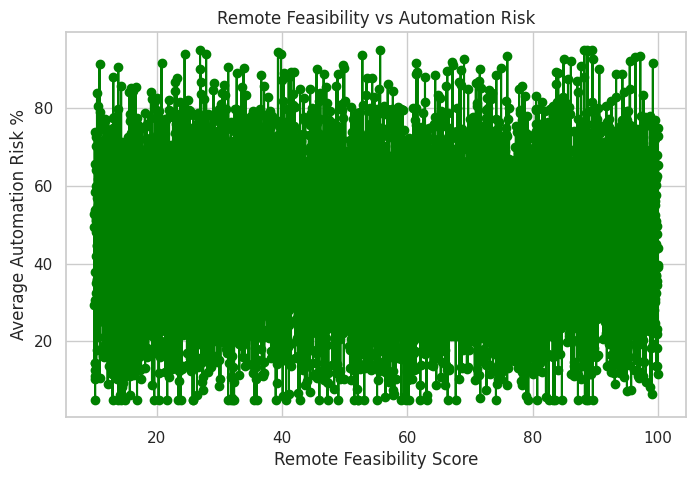

In [21]:
remote_data = df.groupby('remote_feasibility_score')['automation_risk_percent'].mean()

plt.figure(figsize=(8,5))
plt.plot(remote_data.index, remote_data.values, 
         marker='o', color='green')

plt.title('Remote Feasibility vs Automation Risk')
plt.xlabel('Remote Feasibility Score')
plt.ylabel('Average Automation Risk %')
plt.show()

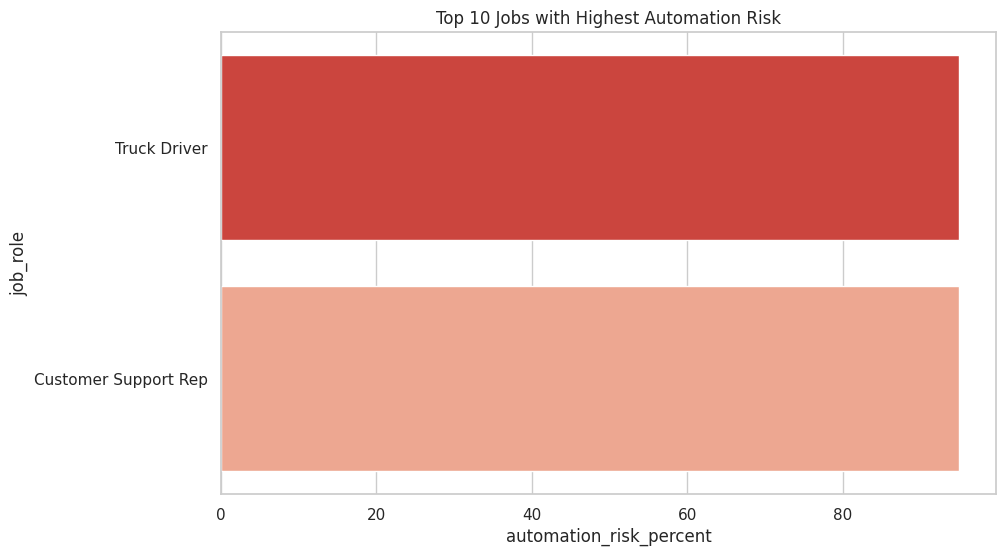

In [22]:
top_risk = df.sort_values(by='automation_risk_percent', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_risk, 
            x='automation_risk_percent', 
            y='job_role',
            palette='Reds_r')

plt.title('Top 10 Jobs with Highest Automation Risk')
plt.show()

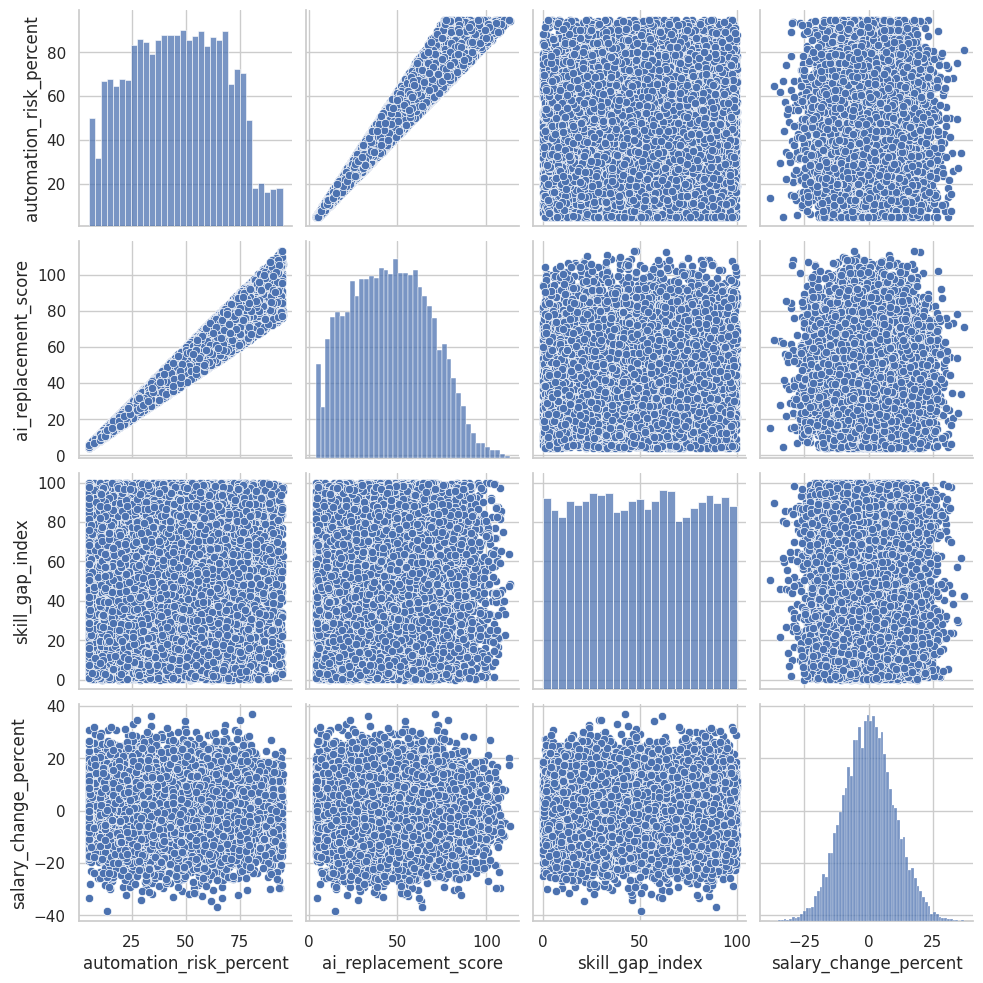

In [23]:
sns.pairplot(df[['automation_risk_percent',
                 'ai_replacement_score',
                 'skill_gap_index',
                 'salary_change_percent']],
             palette='husl')
plt.show()

## ML Algorithms

In [24]:
target = "automation_risk_category"

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Target column
target = "automation_risk_category"

X = df.drop(columns=[target])
y = df[target]

In [27]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [28]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [30]:
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

In [32]:
results = {}

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.2f}%")

Logistic Regression Accuracy: 99.20%
Random Forest Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
SVM Accuracy: 96.43%
AdaBoost Accuracy: 100.00%


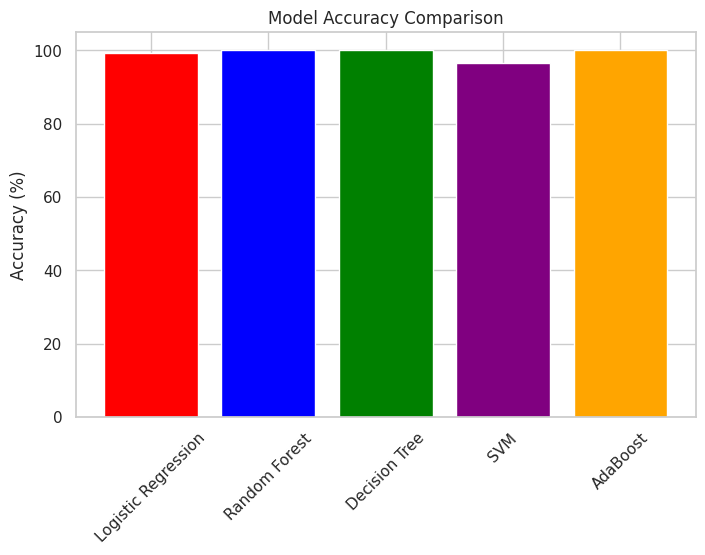

In [33]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['red','blue','green','purple','orange'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

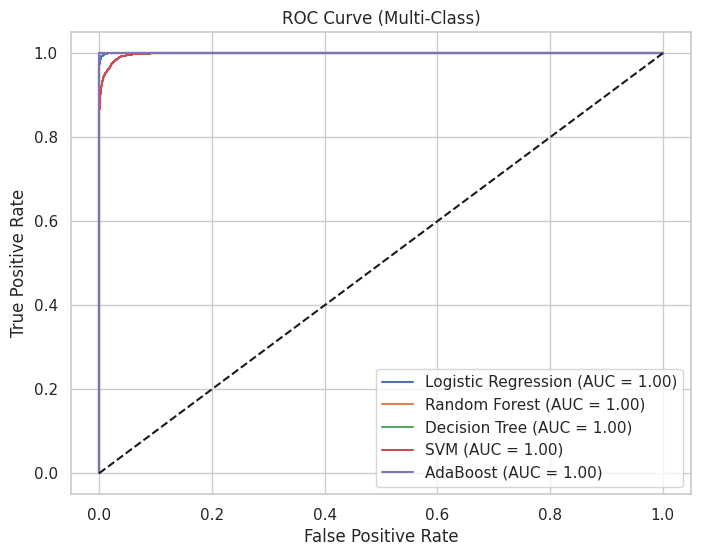

In [34]:
# Binarize target for multi-class ROC
classes = np.unique(y_encoded)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for name, model in models.items():
    
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_score = pipeline.predict_proba(X_test)
    
    auc_score = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

## Thank you..pls upvote!!!!!!!